<a href="https://colab.research.google.com/github/ctarrington/data-science-hw/blob/master/kalman-filters/rlabbe/rlabbe_07_math_scraps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install filterpy

In [2]:
import numpy as np

from matplotlib.pyplot import plot, figure
from matplotlib import pyplot as plt

from scipy.linalg import expm

from ipywidgets import fixed, interact
import ipywidgets as widgets

In [6]:
def phase_portrait(A00, A01, A10, A11, dt, side, step, count, view_side):
  
  A = np.array([[A00,A01], [A10, A11]])
  F = expm(A*dt)
  print('A\n', A)
  print('F\n', F)
  lines = []

  start = - side/2
  stop = side/2

  xlim_min = -view_side/2
  xlim_max = view_side/2

  ylim_min = -view_side/2
  ylim_max = view_side/2
  
  for p in np.arange(start, stop, step):
    for v in np.arange(start, stop, step):
      line = []
      x = np.array([[p, v]]).T
      line.append(x)
      for _ in range(count):
        x = F.dot(x)
        line.append(x)

      lines.append(line)

  figure(figsize=(8,8)) 
  for line in lines:
    states = np.array(line)
    plot(states[0,0], states[0,1], '.', markersize=5)
    plot(states[:,0], states[:, 1], linewidth=1)

  plt.title('Phase Portrait')
  plt.xlabel('position')
  plt.ylabel('velocity')
  plt.xlim((xlim_min, xlim_max))
  plt.ylim((ylim_min, ylim_max))
  plt.show()

A
 [[1 2]
 [3 2]]
F
 [[1.05929876 0.10806933]
 [0.162104   1.11333342]]


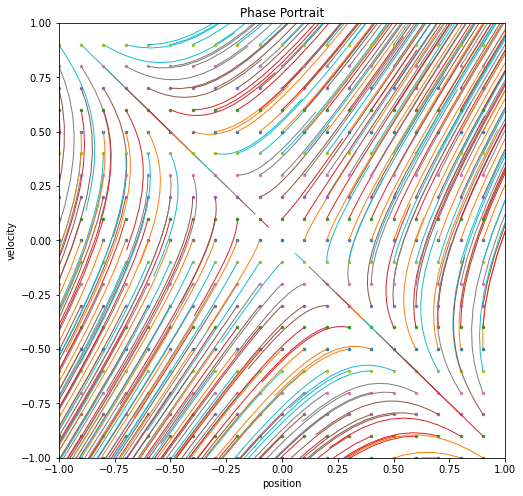

In [7]:
phase_portrait(A00=1, A01=2,A10=3,A11=2, dt=0.05, side=2, step=0.1, count=10, view_side=2)


In [8]:
interact(phase_portrait,
         A00=widgets.IntText(1,min=-8, max=8),
         A01=widgets.IntText(-1,min=-8, max=8),
         A10=widgets.IntText(2,min=-8, max=8),
         A11=widgets.IntText(-1,min=-8, max=8),
         dt=widgets.FloatSlider(0.1, min=0.05, max=1),
         side=widgets.IntText(2, min=-50, max=50),
         step=widgets.FloatText(0.2, min=0.05, max=2),
         count=widgets.IntText(30, min=2, max=200),
         view_side=widgets.FloatText(2, min=-100, max=100),
         )


interactive(children=(IntText(value=1, description='A00'), IntText(value=-1, description='A01'), IntText(value…

<function __main__.phase_portrait>